In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import random

In [24]:
SOURCE_DIR = 'Tomato Dataset'

# Target directories (created)
BASE_DIR = 'tomato_dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
VAL_DIR = os.path.join(BASE_DIR, 'val')
TEST_DIR = os.path.join(BASE_DIR, 'test')

# Split ratios
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Make sure base folders exist
for split_dir in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    os.makedirs(split_dir, exist_ok=True)

# Go through each class folder
for class_name in os.listdir(SOURCE_DIR):
    class_path = os.path.join(SOURCE_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    # List all images in the class
    images = os.listdir(class_path)
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_split)
    val_end = train_end + int(total * val_split)

    # Split images
    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    # Create class subfolders
    for split_name, split_imgs in zip(
        ['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]
    ):
        split_class_dir = os.path.join(BASE_DIR, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        for img in split_imgs:
            src = os.path.join(class_path, img)
            dst = os.path.join(split_class_dir, img)
            shutil.copy(src, dst)

print("Dataset successfully split into train, val, test folders.")

Dataset successfully split into train, val, test folders.


In [25]:
#loading the dataset which is splitted
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATASET_DIR = 'tomato_dataset'
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
VAL_DIR = os.path.join(DATASET_DIR, 'val')
TEST_DIR = os.path.join(DATASET_DIR, 'test')

In [26]:
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    VAL_DIR, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    TEST_DIR, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 15973 images belonging to 10 classes.
Found 10802 images belonging to 10 classes.
Found 6570 images belonging to 10 classes.


In [27]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(224, 224, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,682 (91.20 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - accuracy: 0.4193 - loss: 1.6797 - val_accuracy: 0.6972 - val_loss: 1.1371
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 357s 714ms/step - accuracy: 0.5856 - loss: 1.1942 - val_accuracy: 0.7425 - val_loss: 0.7931
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 360s 720ms/step - accuracy: 0.6706 - loss: 0.9685 - val_accuracy: 0.7943 - val_loss: 0.6494
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 360s 720ms/step - accuracy: 0.7103 - loss: 0.8391 - val_accuracy: 0.8590 - val_loss: 0.4855
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 360s 719ms/step - accuracy: 0.7436 - loss: 0.7560 - val_accuracy: 0.8725 - val_loss: 0.4458
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 360s 720ms/step - accuracy: 0.7592 - loss: 0.6923 - val_accuracy: 0.8605 - val_loss: 0.4343
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 366s 731ms/step - accuracy: 0.7804 - loss: 0.6439 - val_accuracy: 0.9063 - val_loss: 0.3107
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 364s 728ms/step - accuracy: 0.8011 - lo

In [29]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

206/206 ━━━━━━━━━━━━━━━━━━━━ 117s 570ms/step - accuracy: 0.9441 - loss: 0.2241
Test Accuracy: 94.41%


In [31]:
#save the model
model.save('models/cnn_tomato_model.h5')

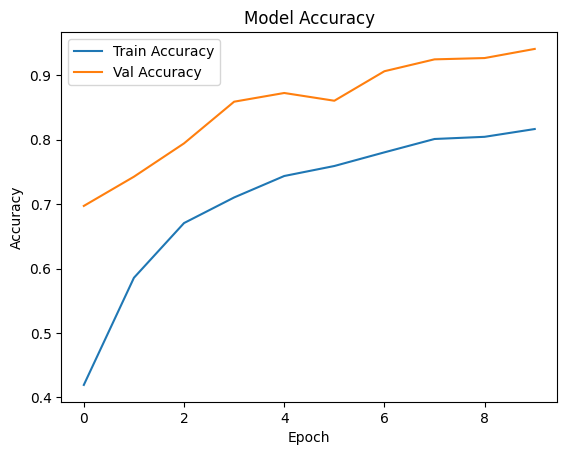

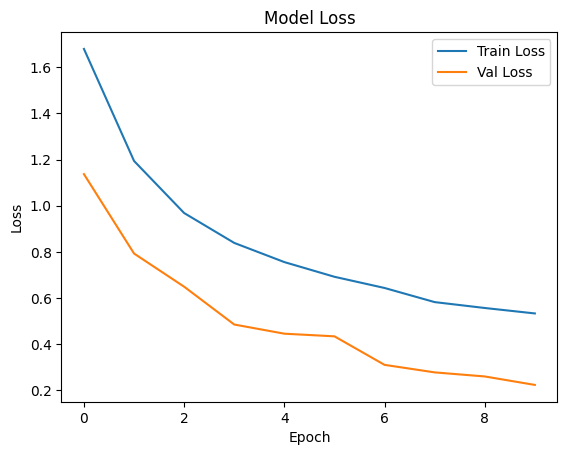

In [32]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

206/206 ━━━━━━━━━━━━━━━━━━━━ 29s 141ms/step
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.98      0.96      0.97       892
                        Tomato_Early_blight       0.93      0.75      0.83       410
                         Tomato_Late_blight       0.93      0.95      0.94       781
                           Tomato_Leaf_Mold       0.97      0.89      0.93       393
                  Tomato_Septoria_leaf_spot       0.93      0.95      0.94       725
Tomato_Spider_mites_Two_spotted_spider_mite       0.97      0.91      0.94       692
                        Tomato__Target_Spot       0.87      0.97      0.92       567
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.94      0.99      0.97      1310
                Tomato__Tomato_mosaic_virus       0.91      0.88      0.90       160
                             Tomato_healthy       0.99      0.99      0.99       640

                   

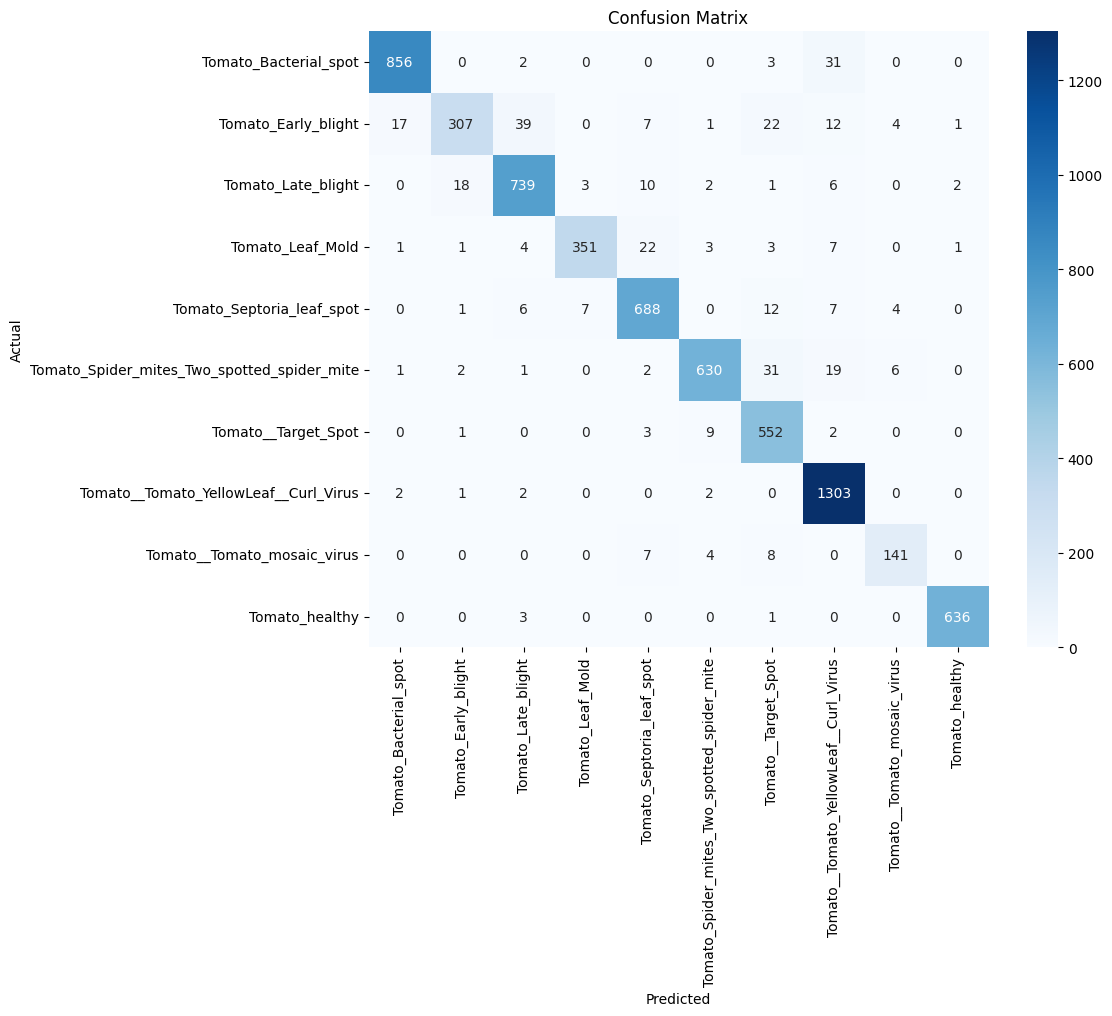

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict classes
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Labels
labels = list(test_generator.class_indices.keys())

# Report
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
import os
print(os.path.exists('models/cnn_tomato_model.h5'))

True
